# Data Exploration

## Data Sources:

Novel Corona Virus 2019 Dataset
Day level information on covid-19 affected cases
https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset/kernels

## Imports 

In [1]:
%matplotlib inline
import os
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
from scipy.signal import periodogram
sns.set(style="white")
sns.set()

## Data Wrangling

In [2]:
data_dir = 'data/novel-corona-virus-2019-dataset/'

file_confimed = 'time_series_covid_19_confirmed.csv'
file_deaths = 'time_series_covid_19_deaths.csv'
file_recovered = 'time_series_covid_19_recovered.csv'

df_confirmed = pd.read_csv(os.path.join(data_dir, file_confimed))
df_deaths = pd.read_csv(os.path.join(data_dir, file_deaths))
df_recovered = pd.read_csv(os.path.join(data_dir, file_recovered))

# Sort by highest value at most recently updated date
df_confirmed.sort_values(by='3/10/20', inplace=True, ascending=False)
df_deaths.sort_values(by='3/10/20', inplace=True, ascending=False)
df_recovered.sort_values(by='3/10/20', inplace=True, ascending=False)

In [3]:
df_deaths

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20
12,Hubei,Mainland China,30.9756,112.2707,17,17,24,40,52,76,...,2803,2835,2871,2902,2931,2959,2986,3008,3024,NaN
51,NaN,Italy,43.0000,12.0000,0,0,0,0,0,0,...,52,79,107,148,197,233,366,463,631,827.0
241,NaN,Iran (Islamic Republic of),32.0000,53.0000,0,0,0,0,0,0,...,66,77,92,107,124,145,194,237,291,NaN
242,NaN,Republic of Korea,36.0000,128.0000,0,0,0,0,0,0,...,28,28,35,35,42,44,50,53,54,NaN
54,NaN,Spain,40.0000,-4.0000,0,0,0,0,0,0,...,0,1,2,3,5,10,17,28,35,54.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,"Marion County, IN",US,39.8362,-86.1752,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
164,"Fayette County, KY",US,38.0606,-84.4803,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
163,"Douglas County, NE",US,41.3148,-96.1951,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
162,"Delaware County, PA",US,39.9078,-75.3879,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN


## Analyzing a famous cruise ship's data with this dataset
The Diamond Princess cruise ship is maybe one of the most famous (and experimentally controlled) sources of information for studying the contagion dynamics and death distribution of the virus.

Let's first estimate the death percentage of confirmed cases for this ship

In [4]:
province_state = 'Diamond Princess cruise ship'
dp_deaths = df_deaths['3/10/20'][df_deaths['Province/State'] == province_state]
dp_confirmed = df_confirmed['3/10/20'][df_confirmed['Province/State'] == province_state]

In [5]:
print('Death percentage of confirmed cases', str(round(dp_deaths.iloc[0]/dp_confirmed.iloc[0]*100, 2))+'%')

Death percentage of confirmed cases 0.86%


Also let's plot out the top confirmed cases and deaths per Country/Region

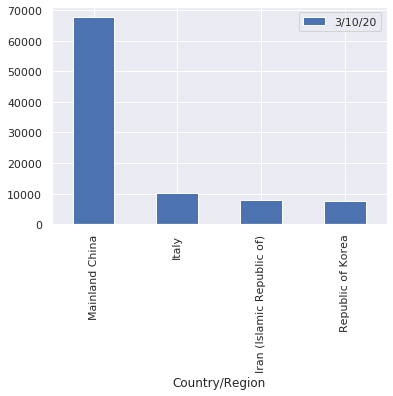

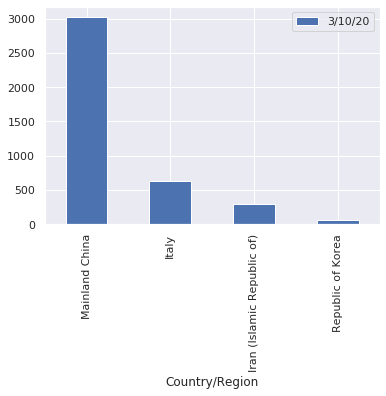

In [6]:
df_confirmed.head(4).plot.bar(x='Country/Region', y='3/10/20')
df_deaths.head(4).plot.bar(x='Country/Region', y='3/10/20')
plt.show()

Now that we've tested the dataset a bit we are ready to plot out other things as well as try to model the disease. One possible equation we can use is the classic SIR compartmental model with components: susceptible $S(t)$, infected $I(t)$, and removed $R(t)$